# Predicting Heart Disease using machine learning

This notebook looks into various python-based ml and data science libraries in an attempt to build a machine learning model capable of predicting wether or not someone has heart diesease or not based on their medical attributes.


## 1. Problem Defination
It is the broblem of binary classification.
> Given clinical parameteres about a pateint, can we predict wether or not they have the heart disease.

## 2. Data
The dataset was downloaded from [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci/)

We use the independent variables(14) to predict our dependent variable(target).

## 3. Evaluation
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure the project.

## 4. Features
Data Dictionary
1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
        0: Typical angina: chest pain related decrease blood supply to the heart
        1: Atypical angina: chest pain not related to heart
        2: Non-anginal pain: typically esophageal spasms (non heart related)
        3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl serum = LDL + HDL + .2 * triglycerides above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
        0: Nothing to note
        1: ST-T Wave abnormality can range from mild symptoms to severe problems signals non-normal heart beat
        2: Possible or definite left ventricular hypertrophy Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
        0: Upsloping: better heart rate with excercise (uncommon)
        1: Flatsloping: minimal change (typical healthy heart)
        2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    colored vessel means the doctor can see the blood passing through the more blood movement the better (no clots)
13. thal - thalium stress result
        1,3: normal
        6: fixed defect: used to be defect but ok now
        7: reversable defect: no proper blood movement when excercising  
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)


## 1. Preparing the tools

In [7]:
#importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#importing models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#importing evualtion metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## 2. Load Data

In [10]:
df = pd.read_csv('heart-disease.csv')
df.shape

(303, 14)

## 3. Data Exploration and Analysis

In [12]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [13]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

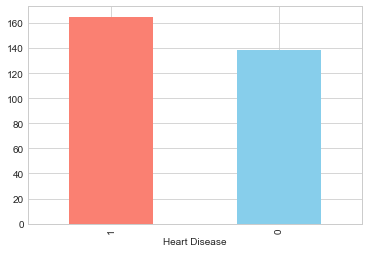

In [38]:
plt.style.use('seaborn-whitegrid')
df.target.value_counts().plot( kind="bar", color=["salmon", "skyblue"], xlabel= 'Heart Disease');

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [31]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


  ### Frequency according to the gender

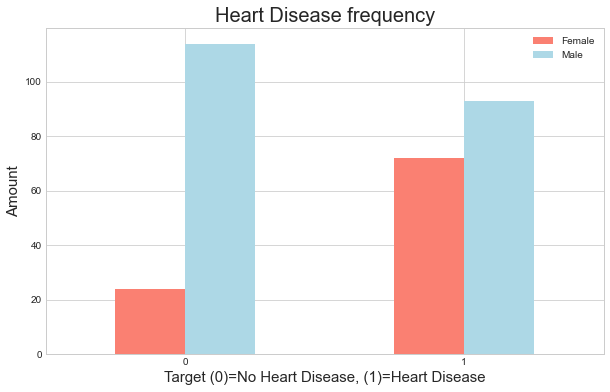

In [67]:
pd.crosstab(df.target, df.sex).plot(kind="bar", color = ["salmon", "lightblue"], figsize=(10,6));
plt.title("Heart Disease frequency", fontdict={"fontsize": 20})
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)
plt.xlabel('Target (0)=No Heart Disease, (1)=Heart Disease',fontdict={"fontsize": 15})
plt.ylabel('Amount',fontdict={"fontsize": 15});

In [68]:
df.thalach.value_counts()

162    11
163     9
160     9
152     8
173     8
       ..
128     1
129     1
134     1
137     1
202     1
Name: thalach, Length: 91, dtype: int64

### Age, Max Heart Rate & Cholestrol for Heart Disease

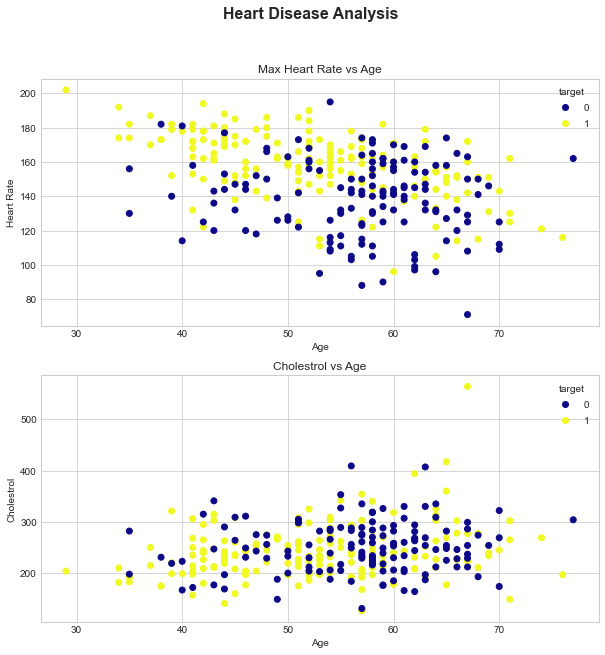

In [118]:
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(10,10))
sc1 = ax0.scatter(df['age'], df['thalach'], c= df['target'],cmap= 'plasma' )
sc2 = ax1.scatter(df['age'], df['chol'], c= df['target'], cmap='plasma')
ax0.set(title="Max Heart Rate vs Age",
        ylabel="Heart Rate",
       xlabel = 'Age')
ax0.legend(*sc1.legend_elements(), title="target")
ax1.set(title="Cholestrol vs Age",
        ylabel="Cholestrol",
       xlabel = 'Age')
ax1.legend(*sc2.legend_elements(), title="target")

fig.suptitle('Heart Disease Analysis', fontsize=16, fontweight='bold');


<AxesSubplot:ylabel='Frequency'>

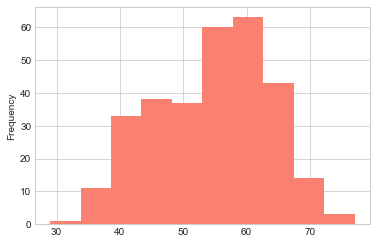

In [114]:
df.age.plot(kind='hist', color='salmon')

### Heart Disease freqeuncy vs Chest Pain

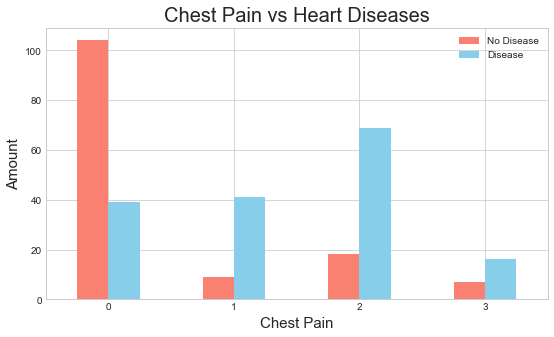

In [123]:
cp_df = pd.crosstab(df.cp, df.target)
cp_df.plot(kind="bar", color=['salmon', 'skyblue'], figsize=(9,5))
plt.title("Chest Pain vs Heart Diseases", fontdict={"fontsize": 20})
plt.xlabel("Chest Pain", fontdict={"fontsize": 15})
plt.ylabel("Amount", fontdict={"fontsize": 15})
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0);


 ### Correlation between independent Attributes

In [128]:
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


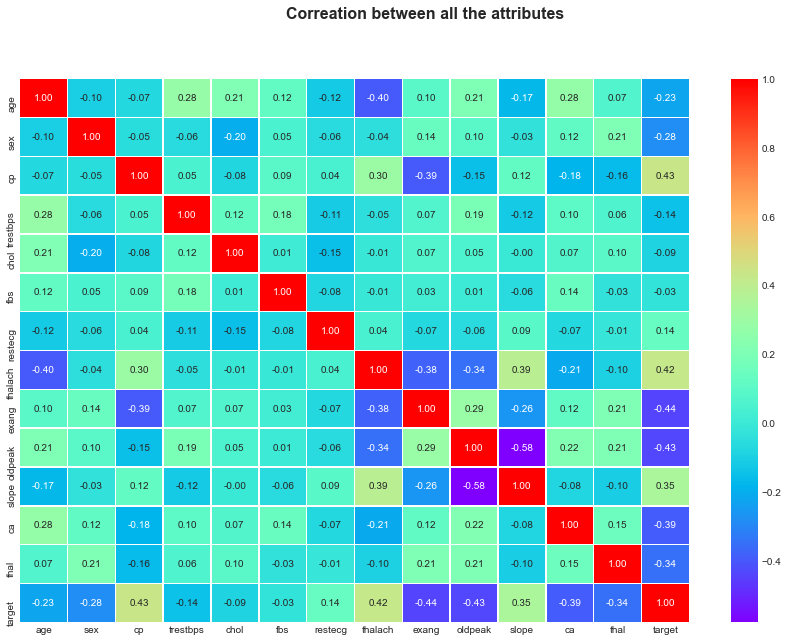

In [134]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,annot=True, 
            linewidths=0.5, 
            fmt= ".2f",  cmap='rainbow')
fig.suptitle('Correation between all the attributes',fontsize=16, fontweight='bold');

## 5. Modelling

In [161]:
#splitting the data
x = df.drop('target', axis=1)
y = df['target']

np.random.seed(42)
#splitting the data into training and testing sets
xtrain ,xtest, ytrain, ytest = train_test_split(x,y, test_size=(0.2))

In [162]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [168]:
len(xtrain), len(ytest)

(242, 61)

#### Model selection
   1. Logistic Regression - `LogisticRegression()`
   2. K-Nearest Neighbors - `KNeighboursClassifier()`
   3. RandomForest - `RandomForestClassifier()`

In [182]:
#Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

#create a function to fit and score models

def fit_and_score(models, xtrain, xtest, ytrain, ytest):
    
    '''
    Fits and evluates given machine learning models.
    '''
    
    #set random seed
    np.random.seed(42)
    
    #make a dictionary to keep model scores
    model_scores = {}
    
    #Loop through models
    for n, model in models.items():
        model.fit(xtrain, ytrain)
        model_scores[n] = model.score(xtest, ytest)
        
    return model_scores

In [183]:
model_scores = fit_and_score(models=models, xtrain=xtrain, xtest=xtest, ytrain=ytrain, ytest=ytest)
model_scores

e:\Documents\ml\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparision

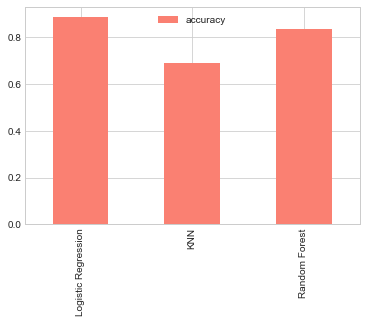

In [190]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot(kind="bar", color= 'salmon');

## Hyperparameter Tuning and Cross-validation

In [193]:
#Tuning KNN
train_scores = []
test_scores = []

#create a list of values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

#Lopp through different n_neighbors

for i in neighbors:
    
    knn.set_params(n_neighbors=i)
    
    #Fit the algorithm
    knn.fit(xtrain,ytrain)
    train_scores.append(knn.score(xtrain,ytrain))
    test_scores.append(knn.score(xtest,ytest))
    

In [194]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [195]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximim KNN score the test data : 75.41%


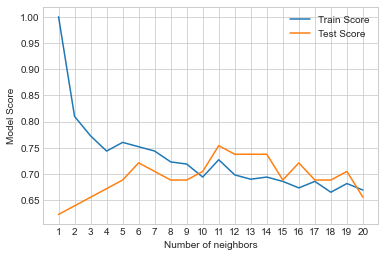

In [198]:
plt.plot(neighbors, train_scores, label='Train Score')
plt.plot(neighbors, test_scores, label='Test Score')
plt.xticks(range(1, 21))
plt.xlabel('Number of neighbors')
plt.ylabel('Model Score')
plt.legend()
print(f'Maximim KNN score the test data : {max(test_scores)*100:.2f}%')

#### Using `RandomizedSearchCV()`

In [211]:
#Tuning LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [214]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(xtrain, ytrain);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [215]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [216]:
rs_log_reg.score(xtest,ytest)*100

88.52459016393442

In [219]:
#Tuning RandomForestClassifier

np.random.seed(42)

#Set up random Hyperparameter Search
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True
                          )

#Fit the model
rs_rf.fit(xtest,ytest)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [296]:
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 12,
 'min_samples_leaf': 9,
 'max_depth': 5}

In [297]:
print(f'The Highest Accuracy Random Forest Classifier achieves is {rs_rf.score(xtest, ytest)*100:.2f}%')

The Highest Accuracy Random Forest Classifier achieves is 90.16%


#### Using `GridSearchCV`

In [240]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 50),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(xtrain, ytrain);

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [241]:
gs_log_reg.best_params_

{'C': 0.18420699693267145, 'solver': 'liblinear'}

In [295]:
gs_log_reg.score(xtest,ytest)

0.8852459016393442

## Evaluating a classification Model

In [251]:
ypreds = rs_rf.predict(xtest)
ypreds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [256]:
np.array(ytest)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

### ROC Curve and AUC Curve

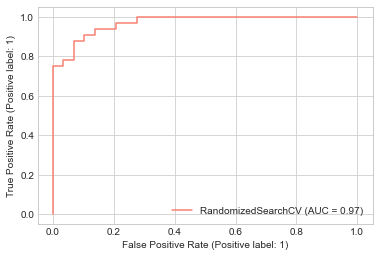

In [260]:
from sklearn.metrics import plot_roc_curve

#Plot ROC Curve and calulate AUC metric
plot_roc_curve(rs_rf, xtest, ytest, color="salmon");

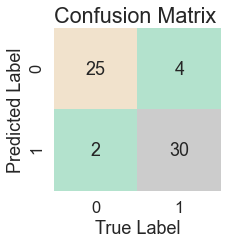

In [264]:
#Confusion metric using seaborn

sns.set(font_scale=1.5)

def plot_conf_mat(ytest, ypreds):
    
    """
    Plots a confusion matrix using seaborn heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax  = sns.heatmap( confusion_matrix(ytest,ypreds),
                     annot = True,
                     cbar=False, cmap= "Pastel2")
    ax.set(xlabel="True Label", ylabel="Predicted Label")
    fig.suptitle("Confusion Matrix")

plot_conf_mat(ytest, ypreds)

### Classification report

In [265]:
print(classification_report(ytest,ypreds))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89        29
           1       0.88      0.94      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



### Calculate evaluaion matrix using cross-validation

In [267]:
#check best hyperparameters
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 12,
 'min_samples_leaf': 9,
 'max_depth': 5}

In [268]:
#Create a new classification instance with the same parameteres

clf = RandomForestClassifier(n_estimators=310, min_samples_split=12, min_samples_leaf=9, max_depth=5)

In [344]:
#Cross Validated accuracy
cv_acc = cross_val_score(clf, x,y, cv=5, scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.831584699453552

In [278]:
#Cross Validated precision
cv_pre = cross_val_score(clf, x,y, cv=5, scoring="precision")
cv_pre = np.mean(cv_pre)
cv_pre

0.8299081035923142

In [279]:
#Cross Validated recall
cv_rec = cross_val_score(clf, x,y, cv=5, scoring="recall")
cv_rec = np.mean(cv_rec)
cv_rec

0.8848484848484848

In [280]:
#Cross Validated f1-score
cv_f1 = cross_val_score(clf, x,y, cv=5, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8614166878872762

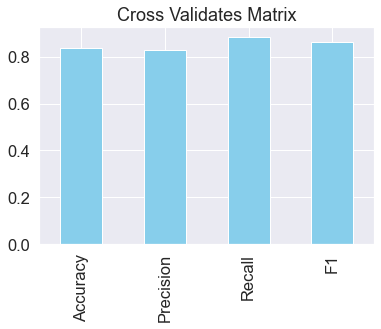

In [290]:
# Visuale Cross validated Matrix
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                         "Precision": cv_pre,
                         "Recall": cv_rec,
                         "F1": cv_f1},
                        index=[0])
cv_metrics.T.plot.bar(title="Cross Validates Matrix", color="skyblue", legend=False);

### Feature Importance

Which features contributes most to the outcome of the model

In [291]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [302]:
rs_rf.score(xtest,ytest)

0.9016393442622951

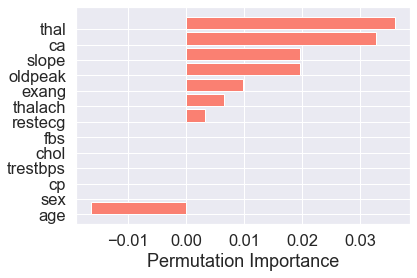

In [338]:
#Using Permutation Based Feature importance for randomforest classifier
np.random.seed(42)
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(rs_rf, xtest, ytest)
s = perm_importance.importances_mean.argsort()

plt.barh(x.columns.tolist(), perm_importance.importances_mean[s], align='edge', color='salmon')
plt.xlabel("Permutation Importance");


In [340]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [342]:
pd.crosstab(df['thal'], df['target'])

target,0,1
thal,,
0,1,1
1,12,6
2,36,130
3,89,28
